In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def generate(m, n):
    #generates m instances with n features
    #X: normally distributed features, 0 mean, 1 variance, no covariance
    #y: randomly uniformly drawn from {0,1} (basically, simulated coin flips)
    #P(y|x) = P(y), meaning that y is independent of x so there is nothing to learn here
    X = np.random.randn(m,n)
    y = np.random.randint(0,2, m)
    return X, y

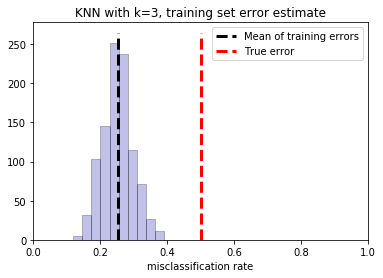

In [2]:
#Training set error
#
#Lesson: never trust your training set error, since your model has already been fitted
#to this particular data set
errors = []
np.random.seed(10)
for i in range(1000):
    X,y = generate(100, 10)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X,y)
    p = knn.predict(X)
    error_rate = 1. - accuracy_score(p, y)
    errors.append(error_rate)
axes = plt.gca()
plt.hist(errors, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(errors)], ylim, '--k', linewidth=3, label='Mean of training errors')
plt.plot(2 * [0.5], ylim, '--r', linewidth=3, label='True error')
plt.title("KNN with k=3, training set error estimate")
plt.legend()
plt.xlim((0,1))
plt.xlabel("misclassification rate")
plt.show()

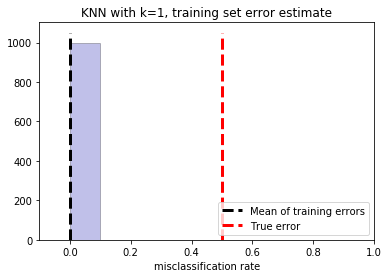

In [3]:
#Training set error with k=1
#
#Lesson: training set error is not a good tool for model selection, since it will favor
#the most complex model that can overfit most (e.g. k-nn with k=1, regularization parameter = 0...)
errors = []
np.random.seed(10)
for i in range(1000):
    X,y = generate(100, 10)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X,y)
    p = knn.predict(X)
    error_rate = 1. - accuracy_score(p, y)
    errors.append(error_rate)
axes = plt.gca()
plt.hist(errors, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(errors)], ylim, '--k', linewidth=3, label='Mean of training errors')
plt.plot(2 * [0.5], ylim, '--r', linewidth=3, label='True error')
plt.title("KNN with k=1, training set error estimate")
plt.legend()
plt.xlim((-0.1,1))
plt.xlabel("misclassification rate")
plt.show()

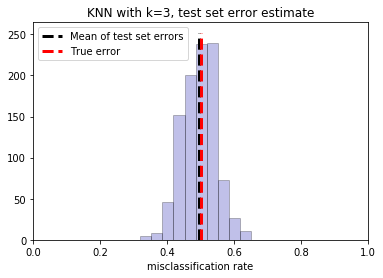

In [4]:
#Test error
#
#Lesson: test set provides unbiased error estimate, when testing only a single
#hypothesis
errors = []
np.random.seed(10)
for i in range(1000):
    X,y = generate(100, 10)
    X_test,y_test = generate(100, 10)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X,y)
    p = knn.predict(X_test)
    error_rate = 1. - accuracy_score(p, y_test)
    errors.append(error_rate)
axes = plt.gca()
plt.hist(errors, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(errors)], ylim, '--k', linewidth=3, label='Mean of test set errors')
plt.plot(2 * [0.5], ylim, '--r', linewidth=3, label='True error')
plt.title("KNN with k=3, test set error estimate")
plt.legend()
plt.xlim((0,1))
plt.xlabel("misclassification rate")
plt.show()

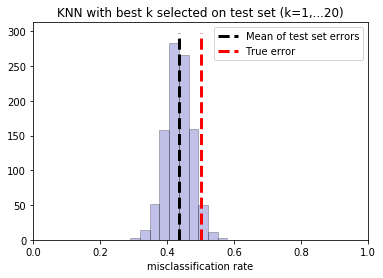

In [5]:
#Test error with model selection included
#
#Lesson: you can overfit to your test set when you choose from multiple alternatives
#the one with best test set performance
errors = []
np.random.seed(10)
for i in range(1000):
    X,y = generate(100, 10)
    X_test,y_test = generate(100, 10)
    best_error = 1.
    for k in range(1,20):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X,y)
        p = knn.predict(X_test)
        error_rate = 1. - accuracy_score(p, y_test)
        if error_rate < best_error:
            best_error = error_rate
    errors.append(best_error)
axes = plt.gca()
plt.hist(errors, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(errors)], ylim, '--k', linewidth=3, label='Mean of test set errors')
plt.plot(2 * [0.5], ylim, '--r', linewidth=3, label='True error')
plt.title("KNN with best k selected on test set (k=1,...20)")
plt.legend()
plt.xlim((0,1))
plt.xlabel("misclassification rate")
plt.show()

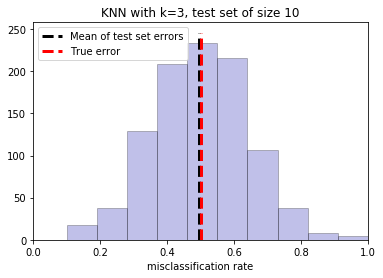

In [6]:
#Test error
#
#Lesson: test set provides unbiased error estimate, but variance can be a problem if we do not have enough data
errors = []
np.random.seed(10)
for i in range(1000):
    X,y = generate(100, 10)
    X_test,y_test = generate(10, 10)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X,y)
    p = knn.predict(X_test)
    error_rate = 1. - accuracy_score(p, y_test)
    errors.append(error_rate)
axes = plt.gca()
plt.hist(errors, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(errors)], ylim, '--k', linewidth=3, label='Mean of test set errors')
plt.plot(2 * [0.5], ylim, '--r', linewidth=3, label='True error')
plt.title("KNN with k=3, test set of size 10")
plt.legend()
plt.xlim((0,1))
plt.xlabel("misclassification rate")
plt.show()

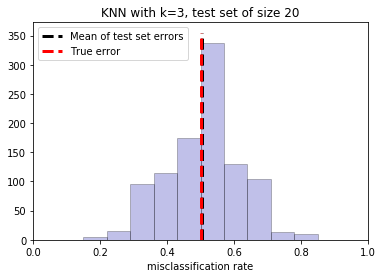

In [7]:
errors = []
np.random.seed(10)
for i in range(1000):
    X,y = generate(100, 10)
    X_test,y_test = generate(20, 10)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X,y)
    p = knn.predict(X_test)
    error_rate = 1. - accuracy_score(p, y_test)
    errors.append(error_rate)
axes = plt.gca()
plt.hist(errors, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(errors)], ylim, '--k', linewidth=3, label='Mean of test set errors')
plt.plot(2 * [0.5], ylim, '--r', linewidth=3, label='True error')
plt.title("KNN with k=3, test set of size 20")
plt.legend()
plt.xlim((0,1))
plt.xlabel("misclassification rate")
plt.show()

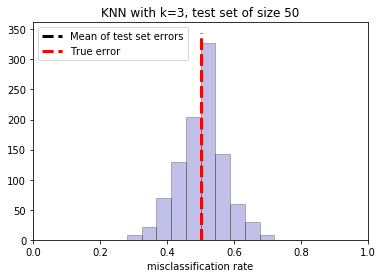

In [8]:
errors = []
np.random.seed(10)
for i in range(1000):
    X,y = generate(100, 10)
    X_test,y_test = generate(50, 10)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X,y)
    p = knn.predict(X_test)
    error_rate = 1. - accuracy_score(p, y_test)
    errors.append(error_rate)
axes = plt.gca()
plt.hist(errors, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(errors)], ylim, '--k', linewidth=3, label='Mean of test set errors')
plt.plot(2 * [0.5], ylim, '--r', linewidth=3, label='True error')
plt.title("KNN with k=3, test set of size 50")
plt.legend()
plt.xlim((0,1))
plt.xlabel("misclassification rate")
plt.show()

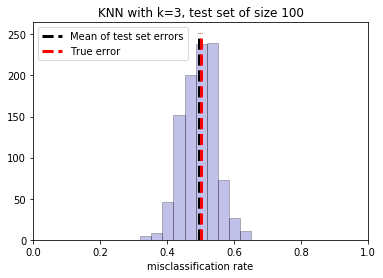

In [9]:
errors = []
np.random.seed(10)
for i in range(1000):
    X,y = generate(100, 10)
    X_test,y_test = generate(100, 10)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X,y)
    p = knn.predict(X_test)
    error_rate = 1. - accuracy_score(p, y_test)
    errors.append(error_rate)
axes = plt.gca()
plt.hist(errors, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(errors)], ylim, '--k', linewidth=3, label='Mean of test set errors')
plt.plot(2 * [0.5], ylim, '--r', linewidth=3, label='True error')
plt.title("KNN with k=3, test set of size 100")
plt.legend()
plt.xlim((0,1))
plt.xlabel("misclassification rate")
plt.show()

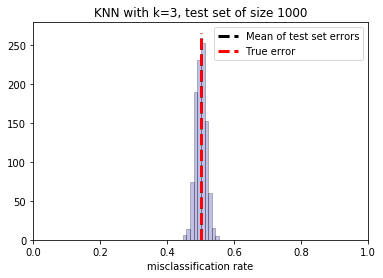

In [10]:
errors = []
np.random.seed(10)
for i in range(1000):
    X,y = generate(100, 10)
    X_test,y_test = generate(1000, 10)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X,y)
    p = knn.predict(X_test)
    error_rate = 1. - accuracy_score(p, y_test)
    errors.append(error_rate)
axes = plt.gca()
plt.hist(errors, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(errors)], ylim, '--k', linewidth=3, label='Mean of test set errors')
plt.plot(2 * [0.5], ylim, '--r', linewidth=3, label='True error')
plt.title("KNN with k=3, test set of size 1000")
plt.legend()
plt.xlim((0,1))
plt.xlabel("misclassification rate")
plt.show()

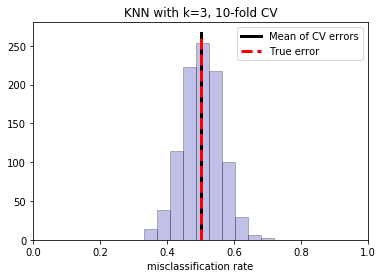

In [11]:
#K-fold cross-validation
#Lesson: K-fold is close to unbiased - on such data where we can actually learn
#something from data we would expect on average slightly higher error for CV
#than the true error, since 1/10th of data is not used for data. This can not
#be seen in this simulation, since discarding part of data does not lead to
#loss of information
import numpy as np
from sklearn.model_selection import KFold
errors = []
np.random.seed(10)
for i in range(1000):
    cv_errors = []
    kf = KFold(n_splits=10)
    X,y = generate(100, 10)
    for train, test in kf.split(X):
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train,y_train)
        p = knn.predict(X_test)
        error_rate = 1. - accuracy_score(p, y_test)
        cv_errors.append(error_rate)
    errors.append( np.mean(cv_errors))
axes = plt.gca()
plt.hist(errors, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(errors)], ylim, '-k', linewidth=3, label='Mean of CV errors')
plt.plot(2 * [0.5], ylim, '--r', linewidth=3, label='True error')
plt.title("KNN with k=3, 10-fold CV")
plt.legend()
plt.xlim((0,1))
plt.xlabel("misclassification rate")
plt.show()
    
    

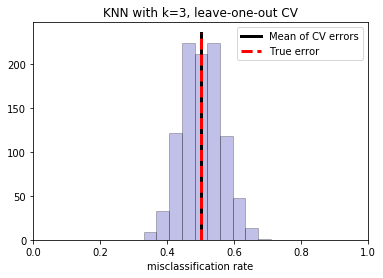

In [12]:
#Leave-one-out CV, this will take a while
#One real data the negative bias of LOOCV would be smaller than for K-fold,
#since on each round we discard only one instance
import numpy as np
from sklearn.model_selection import LeaveOneOut
errors = []
np.random.seed(10)
for i in range(1000):
    loo = LeaveOneOut()
    X,y = generate(100, 10)
    p = []
    for train, test in loo.split(X):
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train,y_train)
        p.append(knn.predict(X_test)[0])
    error_rate = 1. - accuracy_score(p, y)
    errors.append(error_rate)
axes = plt.gca()
plt.hist(errors, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(errors)], ylim, '-k', linewidth=3, label='Mean of CV errors')
plt.plot(2 * [0.5], ylim, '--r', linewidth=3, label='True error')
plt.title("KNN with k=3, leave-one-out CV")
plt.legend()
plt.xlim((0,1))
plt.xlabel("misclassification rate")
plt.show()

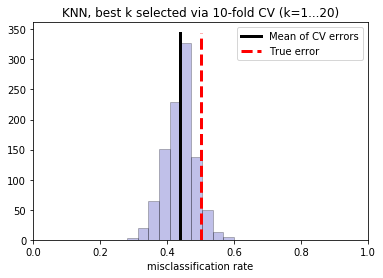

In [13]:
#K-fold cross-validation with model selection
#Notice that this is optimistically biased, it seems that the error is less
#than it really is
#This will take some time
import numpy as np
from sklearn.model_selection import KFold
errors = []
np.random.seed(10)
for i in range(1000):
    kf = KFold(n_splits=10)
    X,y = generate(100, 10)
    best_error = 1.
    for k in range(1,20):
        cv_errors = []
        for train, test in kf.split(X):
            X_train = X[train]
            y_train = y[train]
            X_test = X[test]
            y_test = y[test]
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train,y_train)
            p = knn.predict(X_test)
            error_rate = 1. - accuracy_score(p, y_test)
            cv_errors.append(error_rate)
        cv_error = np.mean(cv_errors)
        if cv_error < best_error:
            best_error = cv_error
    errors.append(best_error)
axes = plt.gca()
plt.hist(errors, edgecolor="black", facecolor='#0504aa', alpha=0.25)
ylim = axes.get_ylim()
plt.plot(2 * [np.mean(errors)], ylim, '-k', linewidth=3, label='Mean of CV errors')
plt.plot(2 * [0.5], ylim, '--r', linewidth=3, label='True error')
plt.title("KNN, best k selected via 10-fold CV (k=1...20)")
plt.legend()
plt.xlim((0,1))
plt.xlabel("misclassification rate")
plt.show()